In [ ]:
'''
@Author = Steven Jonathan
Sign Languange Classifier (Train MNIST Dataset)
'''

'\n@Author = Steven Jonathan\nSign Languange Classifier (Train MNIST Dataset)\n'

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
train_data = pd.read_csv('/content/gdrive/MyDrive/Dataset Sign Languange/sign_mnist_train.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/Dataset Sign Languange/sign_mnist_test.csv')

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
print("Train data shape: ", train_data.shape) #(row, columns)
print("Test data shape: ", test_data.shape)

Train data shape:  (27455, 785)
Test data shape:  (7172, 785)


In [ ]:
train_ToNumpy = train_data.to_numpy() #altenative way is training = train_data.iloc[:,:].values
test_ToNumpy = test_data.to_numpy() # altenative way is test = test_data.iloc[:,:].values
#this passage is to convert dataframe (pandas) --> numpy so we can manipulate it

print(train_ToNumpy)

print(test_ToNumpy)

[[  3 107 118 ... 204 203 202]
 [  6 155 157 ... 103 135 149]
 [  2 187 188 ... 195 194 195]
 ...
 [ 18 174 174 ... 202 200 200]
 [ 17 177 181 ...  64  87  93]
 [ 23 179 180 ... 205 209 215]]
[[  6 149 149 ... 112 120 107]
 [  5 126 128 ... 184 182 180]
 [ 10  85  88 ... 225 224 222]
 ...
 [  2 190 191 ... 211 209 208]
 [  4 201 205 ...  67  70  63]
 [  2 173 174 ... 195 193 192]]


# Seperated Labels and Pixel 

In [ ]:
#Train Data 
y_train = train_ToNumpy[:,0] # Y_train train_labels
print("This Matrix will only contain label only")
print(y_train) #take column (labels) --> row of labels, [3, 6, 2...]

print("\n")

X_train = train_ToNumpy[:,1:] / 255   # X_train train_images
#take columns of pixel, and throw out labels. 
#This is x axis, and divided by 255 to get per pixel
print("This Matrix wil not contain label matrix")
print(X_train) #labels column will not exist in this variable 

print("\n")

#Test Data
test_labels = test_ToNumpy[:,0]  # Y_test 
print("This Matrix will only contain label only")
print(test_labels) #take column (labels) --> row of labels, [3, 6, 2...]

print("\n")

test_images = test_ToNumpy[:, 1:] / 255 # X_test
print("This Matrix wil not contain label matrix")
print(test_images) #labels column will not exist in this variable 

This Matrix will only contain label only
[ 3  6  2 ... 18 17 23]


This Matrix wil not contain label matrix
[[0.41960784 0.4627451  0.49803922 ... 0.8        0.79607843 0.79215686]
 [0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.73333333 0.7372549  0.7372549  ... 0.76470588 0.76078431 0.76470588]
 ...
 [0.68235294 0.68235294 0.68235294 ... 0.79215686 0.78431373 0.78431373]
 [0.69411765 0.70980392 0.72156863 ... 0.25098039 0.34117647 0.36470588]
 [0.70196078 0.70588235 0.70588235 ... 0.80392157 0.81960784 0.84313725]]


This Matrix will only contain label only
[ 6  5 10 ...  2  4  2]


This Matrix wil not contain label matrix
[[0.58431373 0.58431373 0.58823529 ... 0.43921569 0.47058824 0.41960784]
 [0.49411765 0.50196078 0.51372549 ... 0.72156863 0.71372549 0.70588235]
 [0.33333333 0.34509804 0.36078431 ... 0.88235294 0.87843137 0.87058824]
 ...
 [0.74509804 0.74901961 0.74509804 ... 0.82745098 0.81960784 0.81568627]
 [0.78823529 0.80392157 0.81568627 ... 0.

# Check random image dari file yang udah di reshape sama numpy diatas

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

20


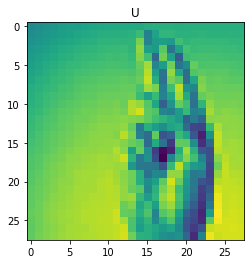

In [ ]:
import random
import matplotlib.pyplot as plt

x = random.randint(1, 27456) #output random number
plt.imshow(train_ToNumpy[x, 1:].reshape(28,28)) #splice train_ToNumpy based on x, and reshape 28x28 shape image
#[baris, kolom] --> ini dia slice, motong baris dulu (x), kemudian motong kolom 1 dan biarinin sisanya

label_index = train_data["label"][x]

plt.title(f"{class_names[label_index]}")

label = train_ToNumpy[x,0] #save the splice data to var label

print(label) #print it


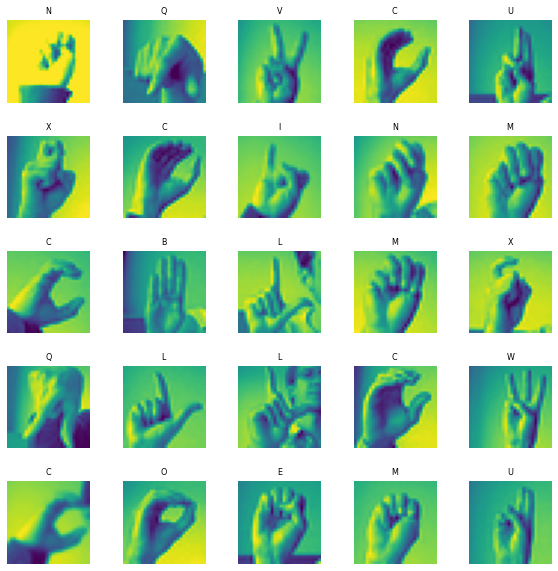

In [ ]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_ToNumpy) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_ToNumpy[index,1:].reshape((28,28)) )
    label_index = int(train_ToNumpy[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Check The Test Image

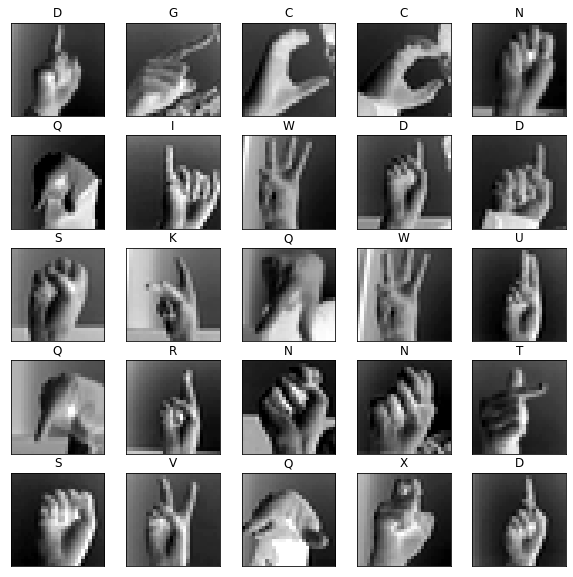

In [ ]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# CNN Architecture, and Run Code

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
test_images = test_images.reshape(test_images.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

print(test_images)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)
[[[[0.58431373]
   [0.58431373]
   [0.58823529]
   ...
   [0.58823529]
   [0.58823529]
   [0.58431373]]

  [[0.58823529]
   [0.58823529]
   [0.58823529]
   ...
   [0.59215686]
   [0.58823529]
   [0.59215686]]

  [[0.58823529]
   [0.59215686]
   [0.59215686]
   ...
   [0.59215686]
   [0.59215686]
   [0.59607843]]

  ...

  [[0.27058824]
   [0.27058824]
   [0.30196078]
   ...
   [0.45490196]
   [0.44313725]
   [0.4627451 ]]

  [[0.29019608]
   [0.29411765]
   [0.29803922]
   ...
   [0.43137255]
   [0.45490196]
   [0.44313725]]

  [[0.29411765]
   [0.29019608]
   [0.29019608]
   ...
   [0.43921569]
   [0.47058824]
   [0.41960784]]]


 [[[0.49411765]
   [0.50196078]
   [0.51372549]
   ...
   [0.52156863]
   [0.5254902 ]
   [0.51764706]]

  [[0.50588235]
   [0.51764706]
   [0.5254902 ]
   ...
   [0.53333333]
   [0.53333333]
   [0.5254902 ]]

  [[0.52156863]
   [0.52941176]
   [0.54117647]
   ...
   [0.54901961]
   [0.54509804]
   [0.54117647]]



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #do convolution
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 512, epochs = 10, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/10
43/43 [==============================] - 18s 394ms/step - loss: 2.8265 - accuracy: 0.1675 - val_loss: 2.0805 - val_accuracy: 0.3777
Epoch 2/10
43/43 [==============================] - 17s 396ms/step - loss: 1.5594 - accuracy: 0.5251 - val_loss: 1.1407 - val_accuracy: 0.6594
Epoch 3/10
43/43 [==============================] - 17s 394ms/step - loss: 0.8786 - accuracy: 0.7319 - val_loss: 0.6916 - val_accuracy: 0.7875
Epoch 4/10
43/43 [==============================] - 17s 395ms/step - loss: 0.5157 - accuracy: 0.8439 - val_loss: 0.4028 - val_accuracy: 0.8869
Epoch 5/10
43/43 [==============================] - 17s 393ms/step - loss: 0.3160 - accuracy: 0.9090 - val_loss: 0.2780 - val_accuracy: 0.9191
Epoch 6/10
43/43 [==============================] - 17s 394ms/step - loss: 0.1903 - accuracy: 0.9506 - val_loss: 0.1573 - val_accuracy: 0.9552
Epoch 7/10
43/43 [==============================] - 17s 393ms/step - loss: 0.1141 - accuracy: 0.9742 - val_loss: 0.0960 - val_accuracy: 0.9800

# Accuracy and Loss Chart

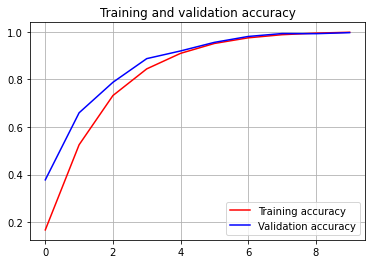

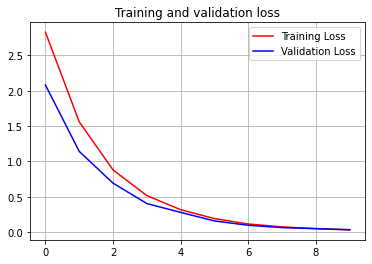

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

In [ ]:
predicted_classes = model.predict_classes(test_images) #train images or Xtest

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


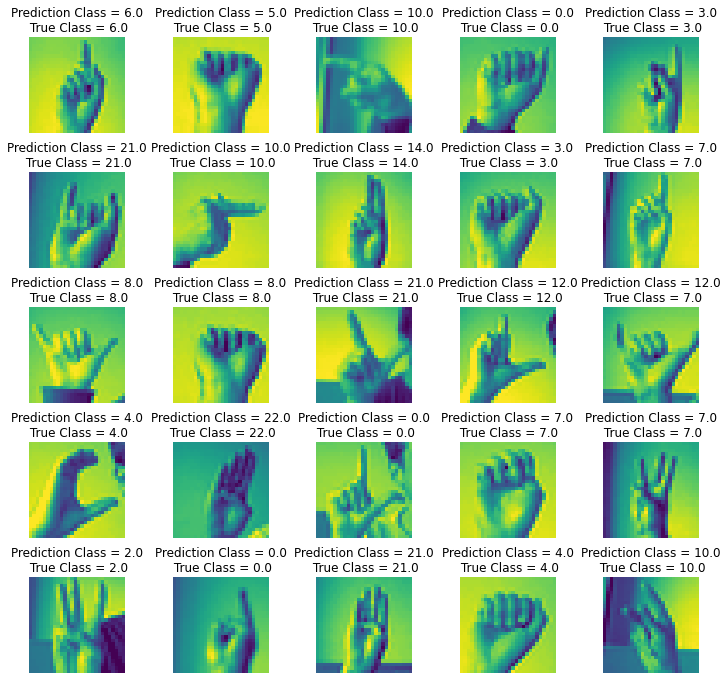

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_train[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, predicted_classes)

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

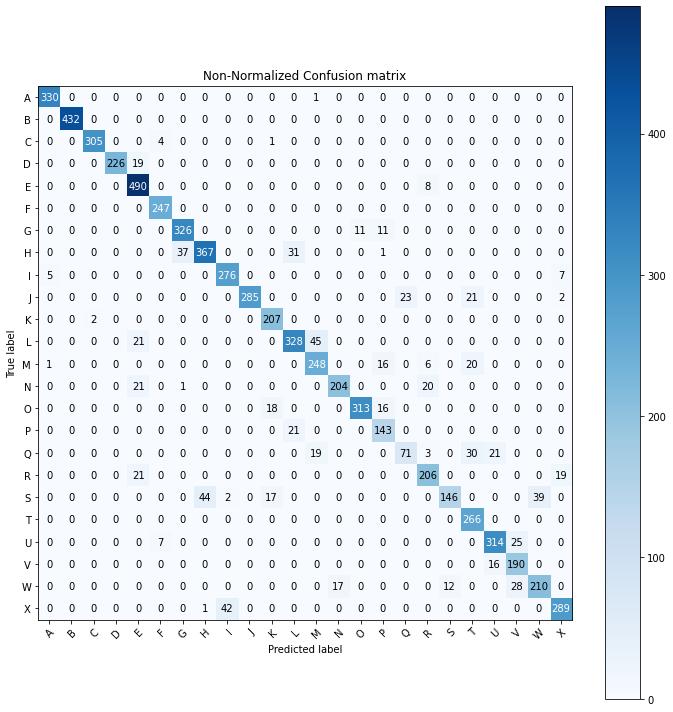

In [ ]:
#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(test_labels, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

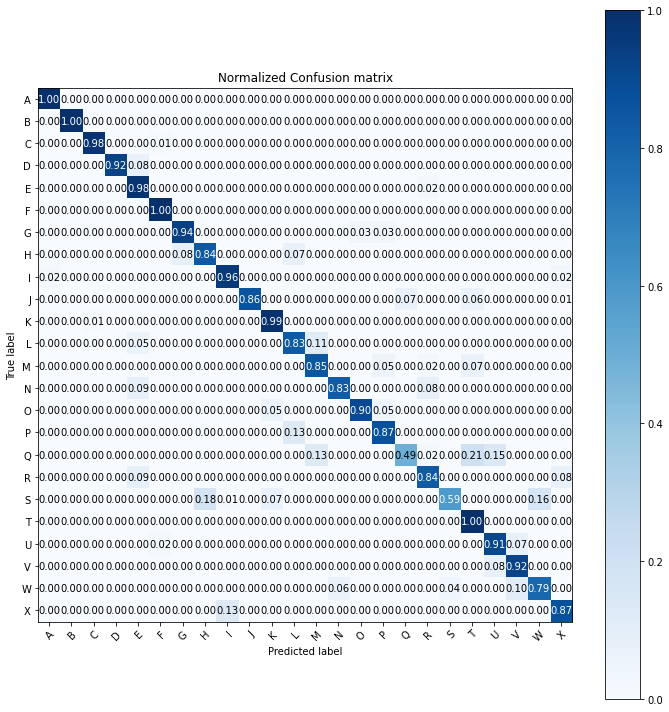

In [ ]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(test_labels, predicted_classes, classes = class_names, normalize=True, title='Normalized Confusion matrix')
plt.show()

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(test_labels, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.8950083658672616


In [ ]:
model.save('Steven_Models.h5') # content --> sample_data --> take the model

In [ ]:
model.save_weights('Steven_Models_weights.h5') # save the weight of the models